In [12]:
# Importer les bibliothèques nécessaires
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Lire le fichier JSON
with open(r"C:\Users\aymen\Downloads\cars_cleaned.json") as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.json_normalize(data)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        25 non-null     object
 1   slug         25 non-null     object
 2   isActive     25 non-null     bool  
 3   isAvailable  25 non-null     bool  
 4   plateNumber  25 non-null     object
 5   isPro        25 non-null     bool  
 6   owner        25 non-null     object
 7   __v          25 non-null     int64 
 8   _id.$oid     25 non-null     object
 9   image.url    25 non-null     object
 10  image.alt    25 non-null     object
 11  image.blur   25 non-null     object
dtypes: bool(3), int64(1), object(8)
memory usage: 2.0+ KB
None


In [9]:
print(df.head())

                   brand                              slug  isActive  \
0  mercedes-v-class-2023  mercedes-v-class-2023-ge-9637724      True   
1  mercedes-v-class-2023   mercedes-v-class-2023-ge-963722      True   
2  mercedes-v-250-d-2022      mercedes-v-250-d-2022-963723      True   
3  mercedes-v-250-d-2022   mercedes-v-250-d-2022-ge-963726      True   
4  mercedes-v-250-d-2023   mercedes-v-250-d-2023-ge-305362      True   

   isAvailable plateNumber  isPro owner  __v                  _id.$oid  \
0         True  GE 9637724   True   SPN    0  668274f8fda998ca4fbad83d   
1         True   GE 963722   True   SPN    0  6682772dfda998ca4fbad8b3   
2         True   GE 963723   True   SPN    0  66827792fda998ca4fbad8d0   
3         True   GE 963726   True   SPN    0  668277cbfda998ca4fbad8e7   
4         True   GE 305362  False   SPN    0  66827aa0fda998ca4fbad910   

                                           image.url image.alt  \
0  https://backend.spn-dashboard.com/api/files/im...    

In [11]:
# Décrire les colonnes numériques
print(df.describe())

        __v
count  25.0
mean    0.0
std     0.0
min     0.0
25%     0.0
50%     0.0
75%     0.0
max     0.0


isAvailable
True     23
False     2
Name: count, dtype: int64


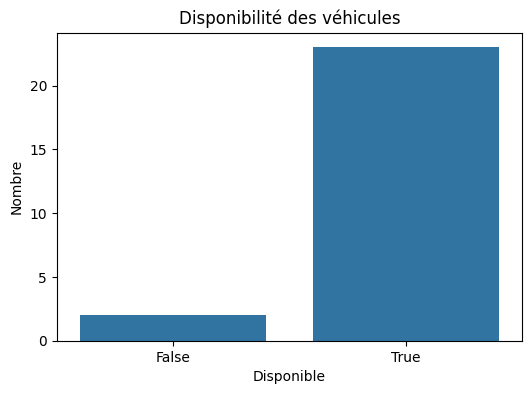

In [5]:
# Statistiques sur la disponibilité des véhicules
availability_counts = df['isAvailable'].value_counts()
print(availability_counts)

# Visualisation de la disponibilité des véhicules
plt.figure(figsize=(6, 4))
sns.countplot(x='isAvailable', data=df)
plt.title('Disponibilité des véhicules')
plt.xlabel('Disponible')
plt.ylabel('Nombre')
plt.show()

owner
SPN    25
Name: count, dtype: int64


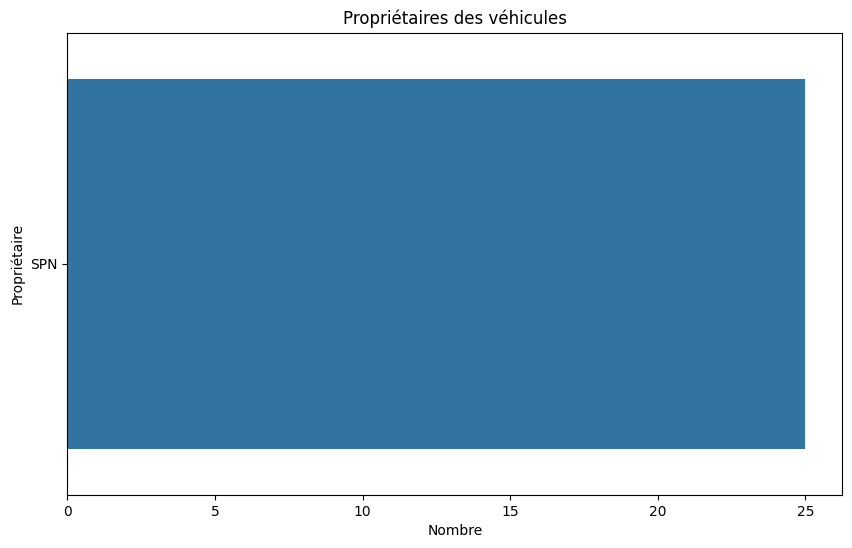

In [6]:
# Statistiques sur les propriétaires des véhicules
owner_counts = df['owner'].value_counts()
print(owner_counts)

# Visualisation des propriétaires des véhicules
plt.figure(figsize=(10, 6))
sns.countplot(y='owner', data=df, order=df['owner'].value_counts().index)
plt.title('Propriétaires des véhicules')
plt.xlabel('Nombre')
plt.ylabel('Propriétaire')
plt.show()

isPro     False  True 
isActive              
False         2      0
True         14      9


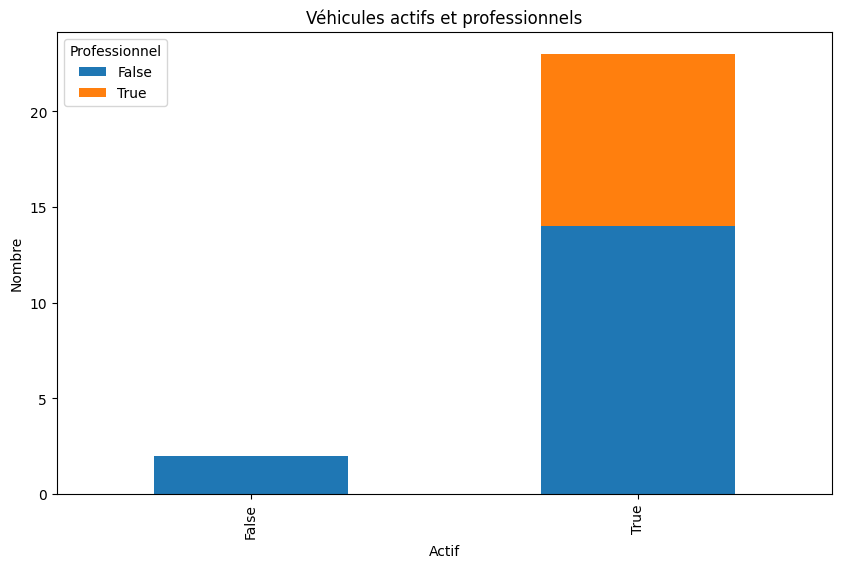

In [7]:

# Ajouter d'autres analyses pertinentes
# Par exemple, analyser les voitures actives et pro
active_pro_counts = df.groupby(['isActive', 'isPro']).size().unstack(fill_value=0)
print(active_pro_counts)

# Visualisation des voitures actives et pro
active_pro_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Véhicules actifs et professionnels')
plt.xlabel('Actif')
plt.ylabel('Nombre')
plt.legend(title='Professionnel')
plt.show()

isAvailable                           False  True 
brand                                             
bmw-118i-2022                             0      1
bmw-840i-2023                             0      1
bmw-x1-2023                               0      1
bmw-x5-2022                               0      1
bmw-x7-2023                               0      1
land-rover-range-rover-defender-2023      0      1
land-rover-range-rover-vogue-2023         0      1
mercedes-c-200-2022                       1      0
mercedes-e-200-2023                       1      0
mercedes-g-500-2023                       0      1
mercedes-s-350-2022                       0      3
mercedes-s-450-2022                       0      1
mercedes-s-450-2023                       0      2
mercedes-v-250-d-2022                     0      2
mercedes-v-250-d-2023                     0      3
mercedes-v-class-2023                     0      3
mini-cooper-2023                          0      1


<Figure size 1400x800 with 0 Axes>

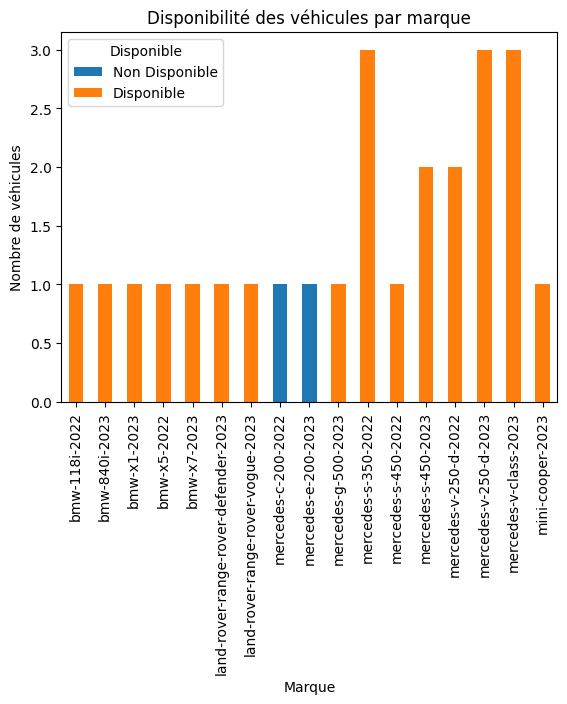

In [14]:
# Compter les occurrences de chaque marque en fonction de la disponibilité
brand_availability_counts = df.groupby(['brand', 'isAvailable']).size().unstack(fill_value=0)
print(brand_availability_counts)

# Visualisation des marques en fonction de la disponibilité
plt.figure(figsize=(14, 8))
brand_availability_counts.plot(kind='bar', stacked=True)
plt.title('Disponibilité des véhicules par marque')
plt.xlabel('Marque')
plt.ylabel('Nombre de véhicules')
plt.legend(title='Disponible', labels=['Non Disponible', 'Disponible'])
plt.xticks(rotation=90)
plt.show()